## ANN Cons:
- ### Too much computation
- ### Treats local pixels same as pixels far apart
- ### Sensitive to location of an object in an image
<br><br>

## CNN Pros
- ### Have neurons for each feature (nose, ears, hands, legs)
- ### reduce overfitting
- ### location invariant
- ### Parameter sharing
- ### Network will detect filters by it's own

### Steps:

<img src="https://i.imgur.com/REl4dWY.png" width=700>

<br><br>
- ### Use filters (convolutional operation or kernal) to get a feature map (usually original data dimension - 2) using relu (making model non linear)
<img src="https://i.imgur.com/kEMpNf3.png" width=700>
- ### Multiple smaller features represent a larger feature
- ### Then flatten and join larger features to form a layer
- ### Apply pooling to reduce computation/voverfitting/tolerance (max/average in a region) (stide=2 means kernal size is 2 x 2)
<img src="https://i.imgur.com/1LzUnCU.png" width=700>
- ### Use data augmentation to generate new rotated samples from existing samples

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# loading train test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# normalize image
X_train = X_train / 255
X_test = X_test / 255

y_train = y_train.reshape(-1, ) # cvt y train to 1 dim array
y_test = y_test.reshape(-1,)

X_train.shape, y_train[:5]

170500096/170498071 [==============================] - 24s 0us/step


((50000, 32, 32, 3), array([6, 9, 9, 4, 1], dtype=uint8))

(None, None)

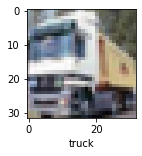

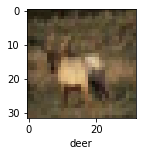

In [4]:
# plot samples
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 1), plot_sample(X_train, y_train, 3)

# ANN

In [5]:
# define and train model
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), # use test set shape
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

ann.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# in this case we don't need to one hot encode y using sparse_categorical_crossentropy (single value)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 1ms/step - loss: 1.8135 - accuracy: 0.3543
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6269 - accuracy: 0.4247
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5415 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4798 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4316 - accuracy: 0.4977


In [6]:
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      1000
           1       0.69      0.48      0.57      1000
           2       0.27      0.60      0.37      1000
           3       0.32      0.40      0.35      1000
           4       0.37      0.41      0.39      1000
           5       0.44      0.29      0.35      1000
           6       0.54      0.45      0.49      1000
           7       0.60      0.40      0.48      1000
           8       0.57      0.60      0.58      1000
           9       0.71      0.32      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.45     10000
weighted avg       0.50      0.45      0.45     10000



# CNN

In [7]:
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

# define and train model
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)), # filter means amount of features
    keras.layers.MaxPooling2D((2, 2)), # can use average pooling as well

    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"), 
    keras.layers.MaxPooling2D((2, 2)),

    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# in this case we don't need to one hot encode y using sparse_categorical_crossentropy (single value)


In [8]:
# huge accuracy improvement
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 2ms/step - loss: 1.4932 - accuracy: 0.4582
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1645 - accuracy: 0.5904
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0487 - accuracy: 0.6336
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9697 - accuracy: 0.6629
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9144 - accuracy: 0.6807
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8648 - accuracy: 0.6988
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8263 - accuracy: 0.7113
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7904 - accuracy: 0.7256
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7579 - accuracy: 0.7350
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.734

In [9]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69      1000
           1       0.80      0.74      0.77      1000
           2       0.56      0.55      0.55      1000
           3       0.48      0.40      0.44      1000
           4       0.62      0.61      0.62      1000
           5       0.50      0.61      0.55      1000
           6       0.67      0.80      0.73      1000
           7       0.72      0.70      0.71      1000
           8       0.80      0.75      0.77      1000
           9       0.74      0.72      0.73      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization

def cnn_best():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	return model

cnn_best = cnn_best()

cnn_best.fit(X_train, y_train, epochs=200)

 loss: 0.9202 - accuracy: 0.6776
Epoch 10/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8909 - accuracy: 0.6854
Epoch 11/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8818 - accuracy: 0.6907
Epoch 12/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8412 - accuracy: 0.7084
Epoch 13/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8120 - accuracy: 0.7195
Epoch 14/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7942 - accuracy: 0.7214
Epoch 15/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7731 - accuracy: 0.7304
Epoch 16/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7692 - accuracy: 0.7298
Epoch 17/200
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7508 - accuracy: 0.7377
Epoch 18/200
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7251 - accuracy: 0.7487
Epoch 19/200
1563/1563 [=======

In [11]:
y_pred = cnn_best.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.95      0.93      0.94      1000
           2       0.87      0.77      0.82      1000
           3       0.78      0.71      0.74      1000
           4       0.82      0.90      0.86      1000
           5       0.81      0.83      0.82      1000
           6       0.87      0.93      0.90      1000
           7       0.91      0.90      0.91      1000
           8       0.90      0.94      0.92      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

